# Bussiness case :

## Introduction :

### Importing importants Labries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
import warnings
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import pickle
from sklearn.pipeline import Pipeline
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
import sklearn
print(sklearn.__version__) # We will be using this version for creating the pipline.
#scikit-learn version 1.2.2 is used while writing the notes

1.2.2


In [4]:
!pip install --upgrade ipython

   ---------------------------------------- 0.0/816.5 kB ? eta -:--:--
    --------------------------------------- 10.2/816.5 kB ? eta -:--:--
   - ------------------------------------- 41.0/816.5 kB 653.6 kB/s eta 0:00:02
   ---- ----------------------------------- 92.2/816.5 kB 1.1 MB/s eta 0:00:01
   -------- ------------------------------- 163.8/816.5 kB 1.2 MB/s eta 0:00:01
   ------------ --------------------------- 245.8/816.5 kB 1.4 MB/s eta 0:00:01
   ---------------- ----------------------- 327.7/816.5 kB 1.4 MB/s eta 0:00:01
   -------------------- ------------------- 409.6/816.5 kB 1.4 MB/s eta 0:00:01
   ------------------------ --------------- 501.8/816.5 kB 1.6 MB/s eta 0:00:01
   ---------------------------- ----------- 583.7/816.5 kB 1.5 MB/s eta 0:00:01
   --------------------------------- ------ 675.8/816.5 kB 1.6 MB/s eta 0:00:01
   ------------------------------------- -- 757.8/816.5 kB 1.7 MB/s eta 0:00:01
   -------------------------------------- - 788.5/816.5 kB

In [5]:
!pip install ydata-profiling

In [16]:
data=pd.read_csv("titanic.csv")  # loading dataset

# Basic Checks '

In [17]:
data.head()   #first 5 rows and columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
data.tail()   #last 5 rows and columns

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [19]:
data.shape # shape of df

(418, 12)

In [20]:
# These columns are not important So we are going to drop mentioned columns
data=data.drop(['Ticket','PassengerId','Name','Cabin'], axis=1)

In [21]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

# Checking for outliers '

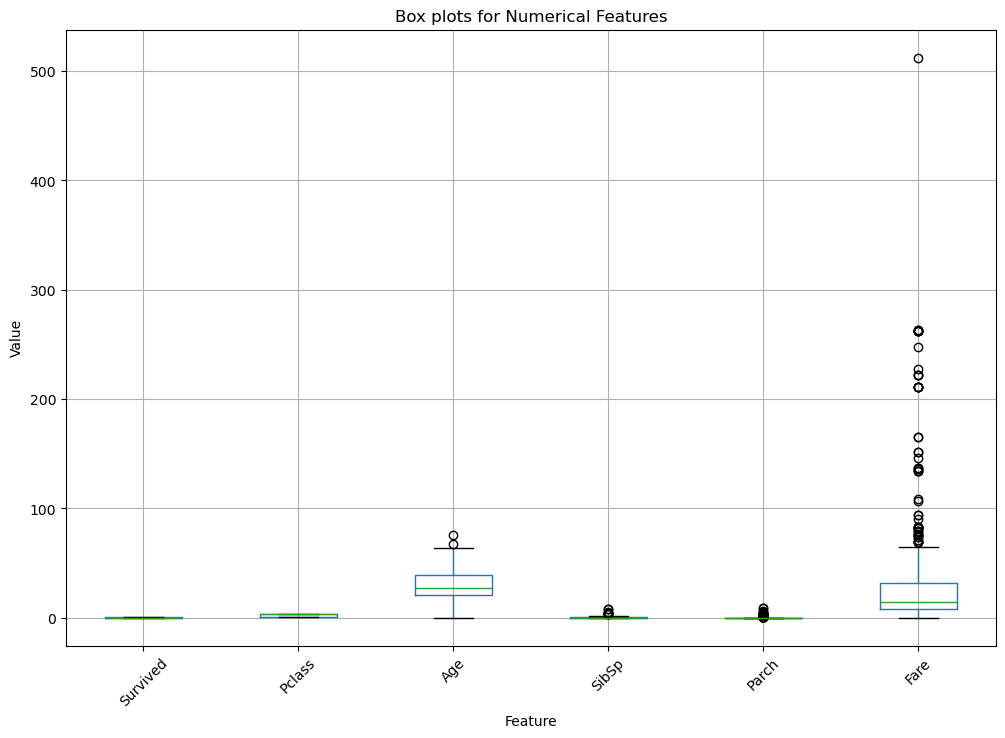

In [22]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['int', 'float']).columns

# Create box plots for all numerical features
plt.figure(figsize=(12, 8))
data[numerical_cols].boxplot()
plt.xticks(rotation=45)
plt.title('Box plots for Numerical Features')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()

## What is an outliers ?


- An outlier is an observation that lies an abnormal distance from other values in a random sample from a population.
- In a sense, this definition leaves it up to the analyst (or a consensus process) to decide what will be considered abnormal.
- An outlier is a single data point that goes far outside the average value of a group of statistics.
- Outliers may be exceptions that stand outside individual samples of populations as well.
- In a more general context, an outlier is an individual that is markedly different from the norm in some respect.

In [26]:
data.info()   # Displaying the schema of df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Pclass    418 non-null    int64  
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [25]:
data.describe()   # stastical description of columns

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# EDA '

In [15]:
profile=ProfileReport(data,title="EDA",explorative=False)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

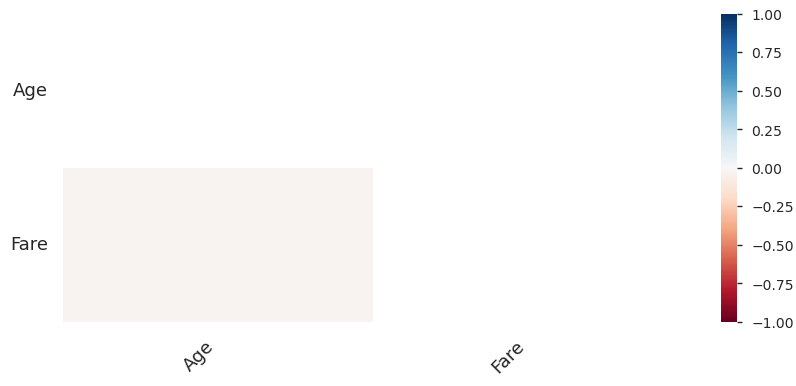

In [16]:
profile

# Correlation Matrix '

<Axes: >

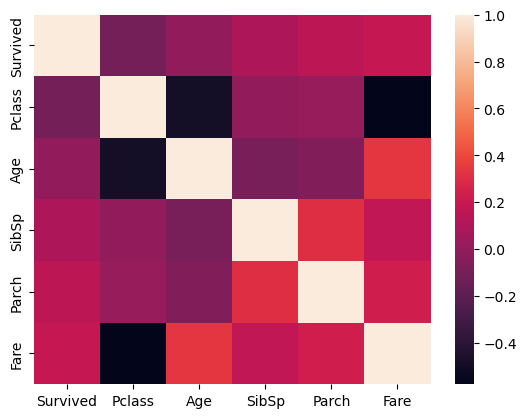

In [17]:
sns.heatmap(data.select_dtypes(include=['int', 'float']).corr())

In [18]:
np.where(data.select_dtypes(include=['int', 'float']).corr()>0.9)

(array([0, 1, 2, 3, 4, 5], dtype=int64),
 array([0, 1, 2, 3, 4, 5], dtype=int64))

- A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set.
- The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.
- We can also set up our own threshold values based on the datasets.

# Data  PreProcessing '

- Data preprocessing is a process of preparing the raw data and making it suitable for a machine learning model.
- It is the first and crucial step while creating a machine learning model.
- When creating a machine learning project, it is not always a case that we come across the clean and formatted data.

In [19]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

### These are continuous columns So We will use standard scaler But We can also divide age by 100 and that can be the transformation for age. Trasformation on age is just to see how we can apply custom transformations without using pre built scikit-learn functions.


- Fare

In [27]:
data['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

# Survived :

In [28]:
data.Survived.value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

- We won't be do anything for this column.

# Using One Hot Encoder here '

## Sex :

In [29]:
data.Sex.value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

- We will be using OHE for this column.

- One-hot encoding is the most widely used categorical encoding technique. It is suitable for nominal categorical variables, where the categories have no inherent order or relationship. The idea behind one-hot encoding is to represent each category as a binary vector. Here’s how it works:

- For each category in a categorical column, a new binary column is created.

- The binary column will have a value of 1 if the class is present, else it will be zero.

# SibSp

In [30]:
data.SibSp.value_counts()

SibSp
0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: count, dtype: int64

 - The values were already arranged ordinally so we don't have to do anything.

# Parch :

In [31]:
data.Parch.value_counts()

Parch
0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: count, dtype: int64

 - The values were already arranged ordinally so we don't have to do anything.

# Using Label Encoder here '

## Embarked :

In [32]:
data.Embarked.value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

- We will be using label encoder for this column.

- Label encoding is suitable for categorical features with only two distinct categories.

- In this technique, each category is assigned a unique integer label. Categories are assigned integer values starting from 0.

- For example, if you have an ordinal categorical feature “Size” with values “Small,” “Medium,” and “Large,” label encoding would convert it.

# Function transformer :

In [33]:
def divide_by_100(x):
    return (x/100)

- we can use FunctionTrasformer to use our own custom function for transformation.
- So we will use this custom function whe we are defining the pipeline.
- We can define our funtion transformer whenever we need that in our pipeline.

In [34]:
custom=FunctionTransformer(divide_by_100)

# Using Modified Label Encoder '

## Column Transformer :

In [35]:
class ModifiedLabelEncoder(LabelEncoder):
    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)

    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)

- You use the ColumnTransformer to transform each column set separately and then you can use the pipeline for multiple transformations of the same columns.
- Column Transformer is a sciket-learn class used to create and apply separate transformers for numerical and categorical data. - To create transformers we need to specify the transformer object and pass the list of transformations inside a tuple along with the column on which you want to apply the transformation.

In [36]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [37]:
# We are defining here each columns that which scaling techniques are used for which columns :


OHE_columns=['Sex']
standard_scaler=['Fare']
function_trasformer=['Age']
label_encoder=['Embarked']


# Steps of preprocesing for features:
- **LabelEncoder for**    :  'Embarked'
- **One hot encoder for** :  'Sex'
- **Standard scaler for** :  'Fare'
- **Function transformer**:  'Age'                     

In [41]:
passthrough=["Pclass", "SibSp", "Parch", "Survived"]

In [39]:
def same(x):
    return x

In [40]:
no_trans=FunctionTransformer(same)

# Defining the preprocessor :

In [42]:
preprocessor=ColumnTransformer([('OHE_columns',OneHotEncoder(),OHE_columns),
                                ('standard_scaler',StandardScaler(),standard_scaler),
                                ('custom',custom,function_trasformer),
                                ('Label_encoder',ModifiedLabelEncoder(),['Embarked']),
                                ('Pass_through',no_trans,passthrough)])

In [43]:
preprocessor

ColumnTransformer(transformers=[('OHE_columns', OneHotEncoder(), ['Sex']),
                                ('standard_scaler', StandardScaler(), ['Fare']),
                                ('custom',
                                 FunctionTransformer(func=<function divide_by_100 at 0x000001CDC80322A0>),
                                 ['Age']),
                                ('Label_encoder', ModifiedLabelEncoder(),
                                 ['Embarked']),
                                ('Pass_through',
                                 FunctionTransformer(func=<function same at 0x000001CDC8121080>),
                                 ['Pclass', 'SibSp', 'Parch', 'Survived'])])

# Creating Pickle file '


In [44]:
file=open("Titanic.pkl","wb")

In [45]:
pickle.dump(preprocessor,file)

In [46]:
file.close()

In [47]:
file=open("Titanic.pkl","rb")

In [48]:
pre=pickle.load(file)